In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from scipy.special import erf
from functions import *

%matplotlib inline

## Let us endeavor to plot the dispersion relation of the electron plasma wave and the effects of Landau damping

Let's look in the range where $\omega/\omega_p \in (0,2)$. I think that I am abusing mathematical notation here for sure.

This isn't working and I am not going to lose my mind over it.

/home/david/.local/lib/python3.10/site-packages/plasmapy/dispersion/dispersion_functions.py:69: RuntimeWarning: invalid value encountered in scalar multiply
  return 1j * np.sqrt(np.pi) * faddeeva_function(zeta)
/home/david/.local/lib/python3.10/site-packages/plasmapy/dispersion/dispersion_functions.py:126: RuntimeWarning: overflow encountered in scalar multiply
  return -2 * (1 + zeta * plasma_dispersion_func(zeta))
/home/david/.local/lib/python3.10/site-packages/plasmapy/dispersion/dispersion_functions.py:126: RuntimeWarning: invalid value encountered in scalar multiply
  return -2 * (1 + zeta * plasma_dispersion_func(zeta))
/home/david/vscode/Landau-damping-EPW-IAW/1-Numerical_solution_kinetic_dispersion_relation/functions.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return 1 - 1/(2*k**2)*zprime(1/np.sqrt(2)*((wr+1j*wi)/k))-1/(2*k**2)*1/ti_over_te*zprime(1/np.sqrt(2)*(wr+1j*wi)/k*np.sqrt(mi_over_me/ti_over_te))
/home/david/vscode/Landau-damping-EPW-IAW/1-Numerical

ValueError: x and y must be the same size

<Figure size 1800x1200 with 0 Axes>

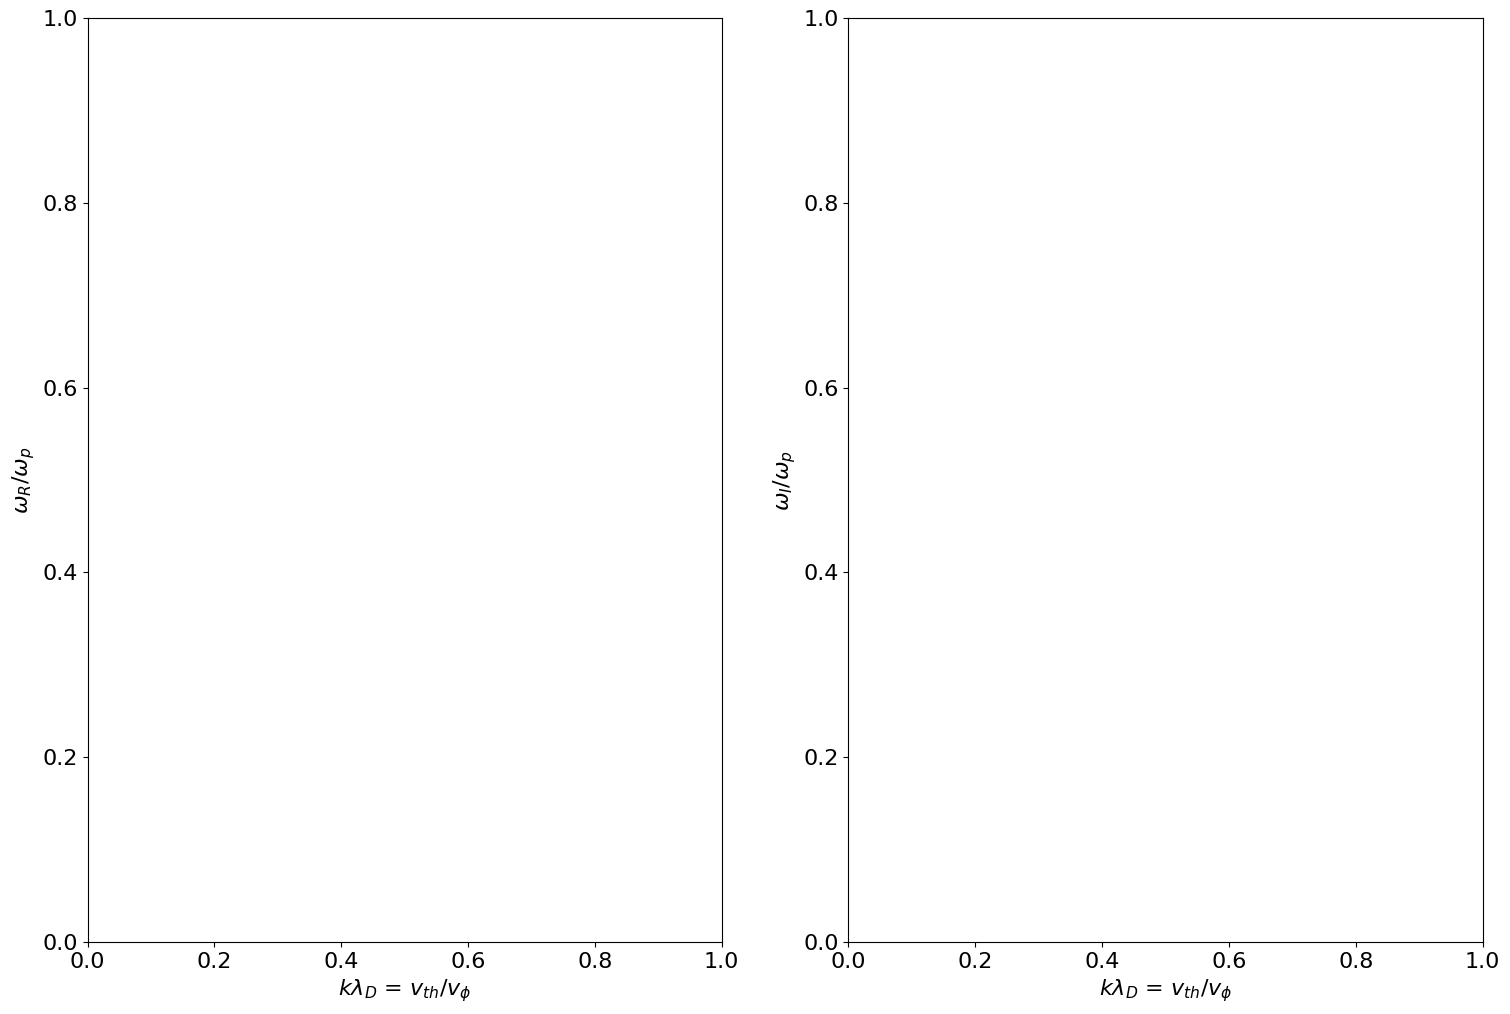

In [4]:
plt.rcParams.update({'font.size': 16})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.036, 1.5, 200)

Ti_over_Te = .025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.1,1.7],Wi_range=[0.3,-0.3])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=2)

#ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
# ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

# ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


# wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
# ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()
#ax1.title('IAW $\omega_r$ dispersion')
#ax2.title('IAW $\omega_i$ dispersion')
plt.savefig('EPW dispersion relations')


## Let us endeavor to plot the dispersion relation for the Ion acoustic wave. 
In order to do this, we would need to look in the range of very small $\omega$

Through trial and error, we found this to be around $\omega/\omega_p \in (10^{-3}, 10^{-2})$

<Figure size 1800x1200 with 0 Axes>

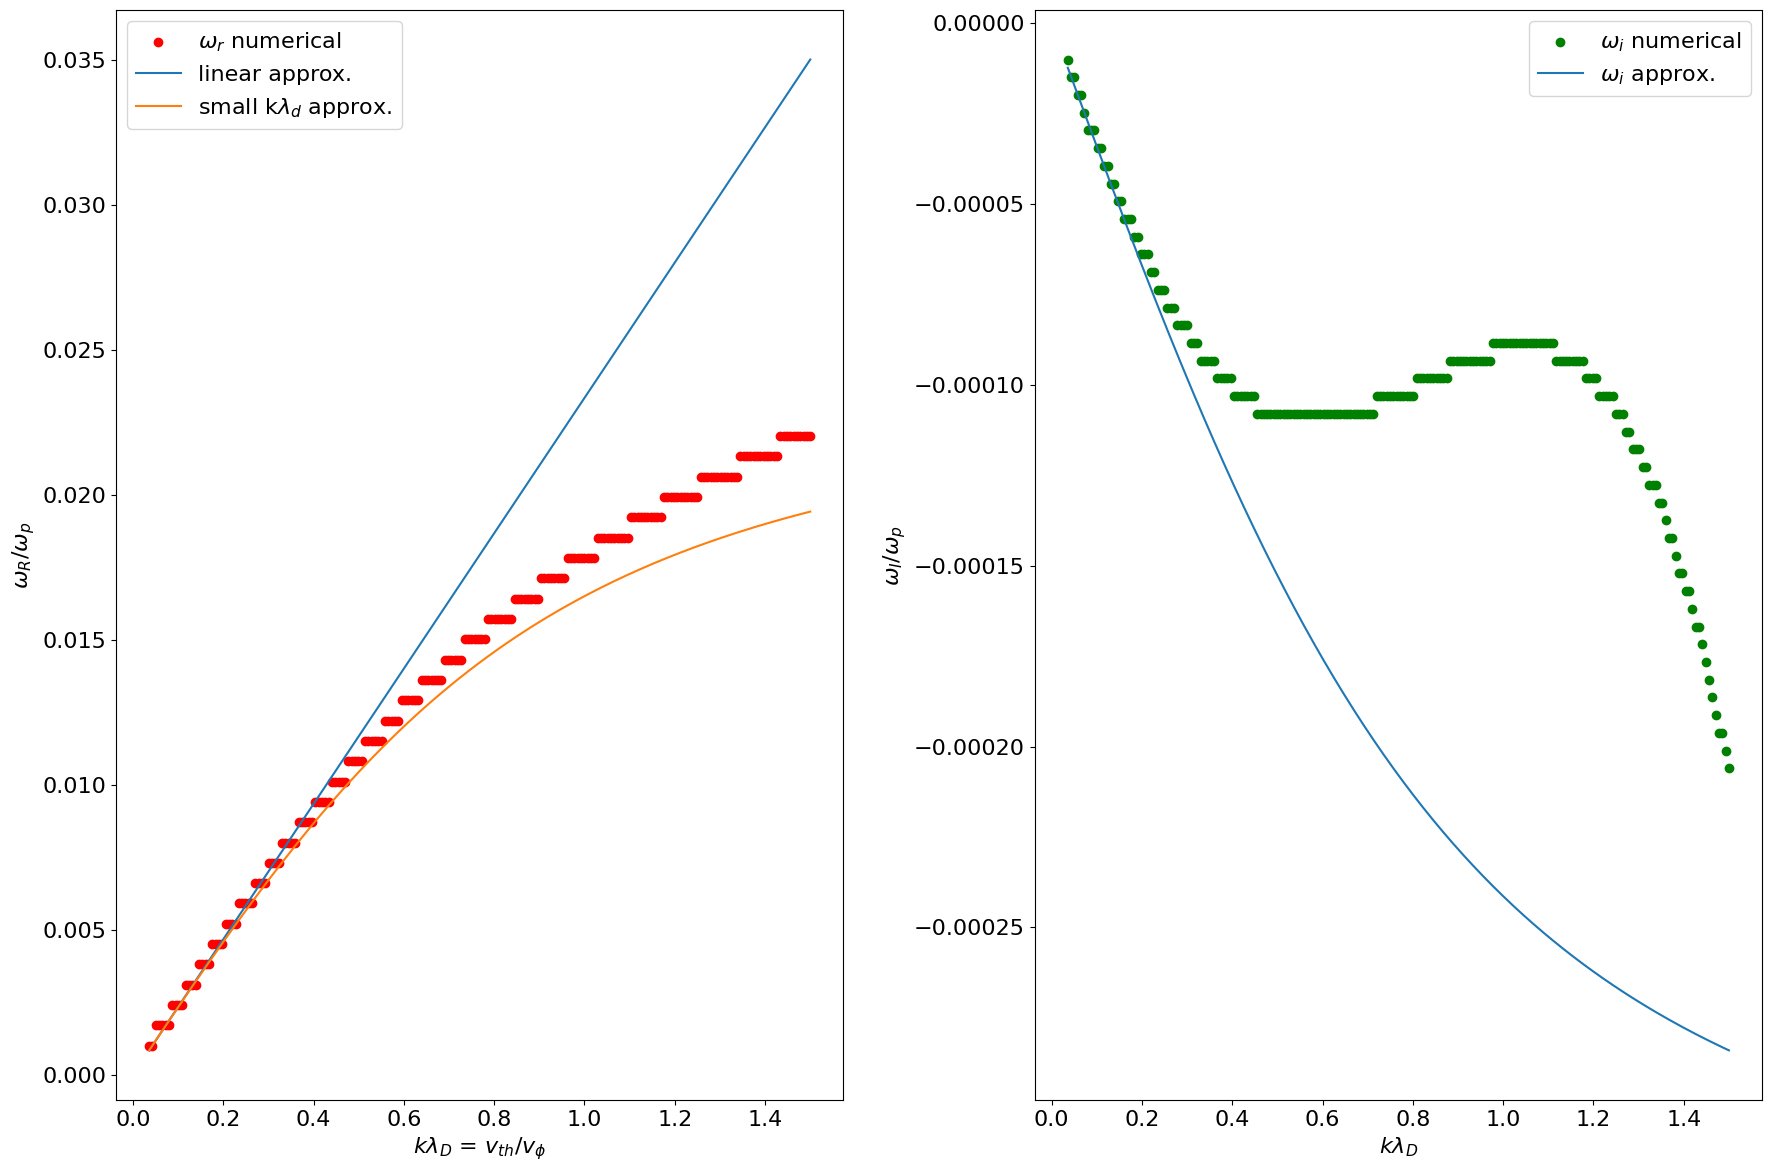

In [2]:
plt.rcParams.update({'font.size': 16})

fig1 = plt.figure(figsize=(18,12))
fig2 = plt.figure(figsize = (18,12))
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax1.set_ylabel(r'$\omega_R/\omega_p$')

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel(r'$k\lambda_D$ = $v_{th}/v_{\phi}$')
ax2.set_ylabel(r'$\omega_I/\omega_p$')

k0s = np.linspace(0.036, 1.5, 200)

Ti_over_Te = .025 # Mess around with this parameter to see the T dependence. As one would expect, if Ti gets too small, IAWs are no longer able to propogate

wr_vals = []
wi_vals = []
for k0 in k0s:
    Wrs, Wis = find_w_roots_plasmapy(k0, Ti_over_Te,Wr_range = [0.001,0.09],Wi_range=[-0.00001,-0.0005])
    wr_vals.append(Wrs)
    wi_vals.append(Wis)
ax1.scatter(k0s, wr_vals, c = 'r', label = '$\omega_r$ numerical')
ax2.scatter(k0s, wi_vals, c = 'g', label = '$\omega_i$ numerical')

plt.tight_layout(h_pad=2)

#ax1.plot(k0s,np.sqrt(1/1836)*np.sqrt(1/(1+k0s**2)+ Ti_over_Te)) # This should be the full expression but it doesn't look right
ax1.plot(k0s, k0s*np.sqrt(1/1836.), label = "linear approx.")

ax1.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2)), label = 'small k$\lambda_d$ approx.')


wi_approx = -np.sqrt(np.pi/8)*(np.sqrt(1/1836.)+ (1/Ti_over_Te)**(3/2)*np.exp(-1/(2*Ti_over_Te)))
ax2.plot(k0s, np.sqrt((1/1836)/(1+1/k0s**2))*wi_approx, label = '$\omega_i$ approx.')

ax1.legend()
ax2.legend()
#ax1.title('IAW $\omega_r$ dispersion')
#ax2.title('IAW $\omega_i$ dispersion')
plt.savefig('IAW dispersion relations')


This looks... ok.

The IAW dispersion relation from fluid theory is: $\omega^2/k^2 = T_e/m_i$

If we normalize these units we get: $\frac{\omega^2}{\omega_p^2} \frac{1}{k^2 \lambda_d^2} = \frac{\omega'^2}{k'^2}= \frac{T_e}{m_i \omega_p^2 \lambda_d^2}$

$\frac{\omega'^2}{k'^2} = \frac{m_e}{m_i} \frac{1}{k_B}$

See above for graph

Maybe we can try making an animation of increasing T_ratio for the presentation?